In [32]:
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report

SR=44100
N_MFCC = 13

In [27]:
def load_hibou_audio_files(directory, sr, n_mfcc=13):
    features = []
    labels = []
    filenames = []
    class_names = sorted(os.listdir(directory))

    for class_name in class_names:
        for filename in os.listdir(os.path.join(directory, class_name)):
            if filename.endswith(".wav"):
                filepath = os.path.join(directory, class_name, filename)
                audio, _ = librosa.load(filepath, sr=sr)
                features.append(audio)
                labels.append(class_name)
                filenames.append(filename)

    return np.array(features), np.array(labels), filenames
x, y, filenames = load_hibou_audio_files("../data/raw/hibou_dataset", sr=SR)

drone 0007_min_210.wav


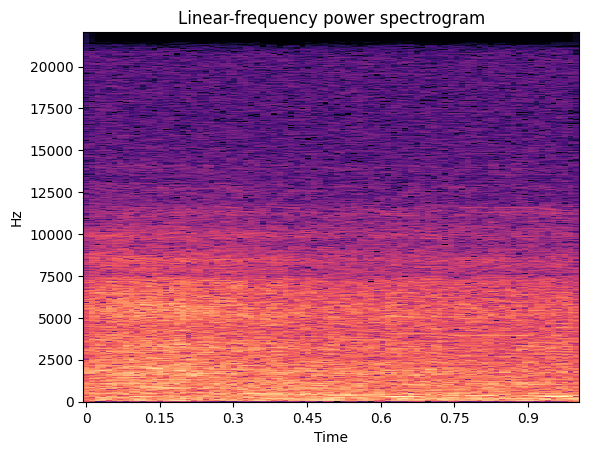

In [4]:
def show_spectogram(feature, sr):
    D = librosa.amplitude_to_db(np.abs(librosa.stft(feature)), ref=np.max)
    fig, ax = plt.subplots(nrows=1, ncols=1, sharex=True)

    img = librosa.display.specshow(D, y_axis="linear", x_axis="time", sr=sr, ax=ax)
    ax.set(title='Linear-frequency power spectrogram')
    ax.label_outer()

# 4765 is the last drone
i = 4762
print(y[i], filenames[i])
show_spectogram(x[i], sr=SR)
from IPython.display import Audio
Audio(data=x[i], rate=SR)

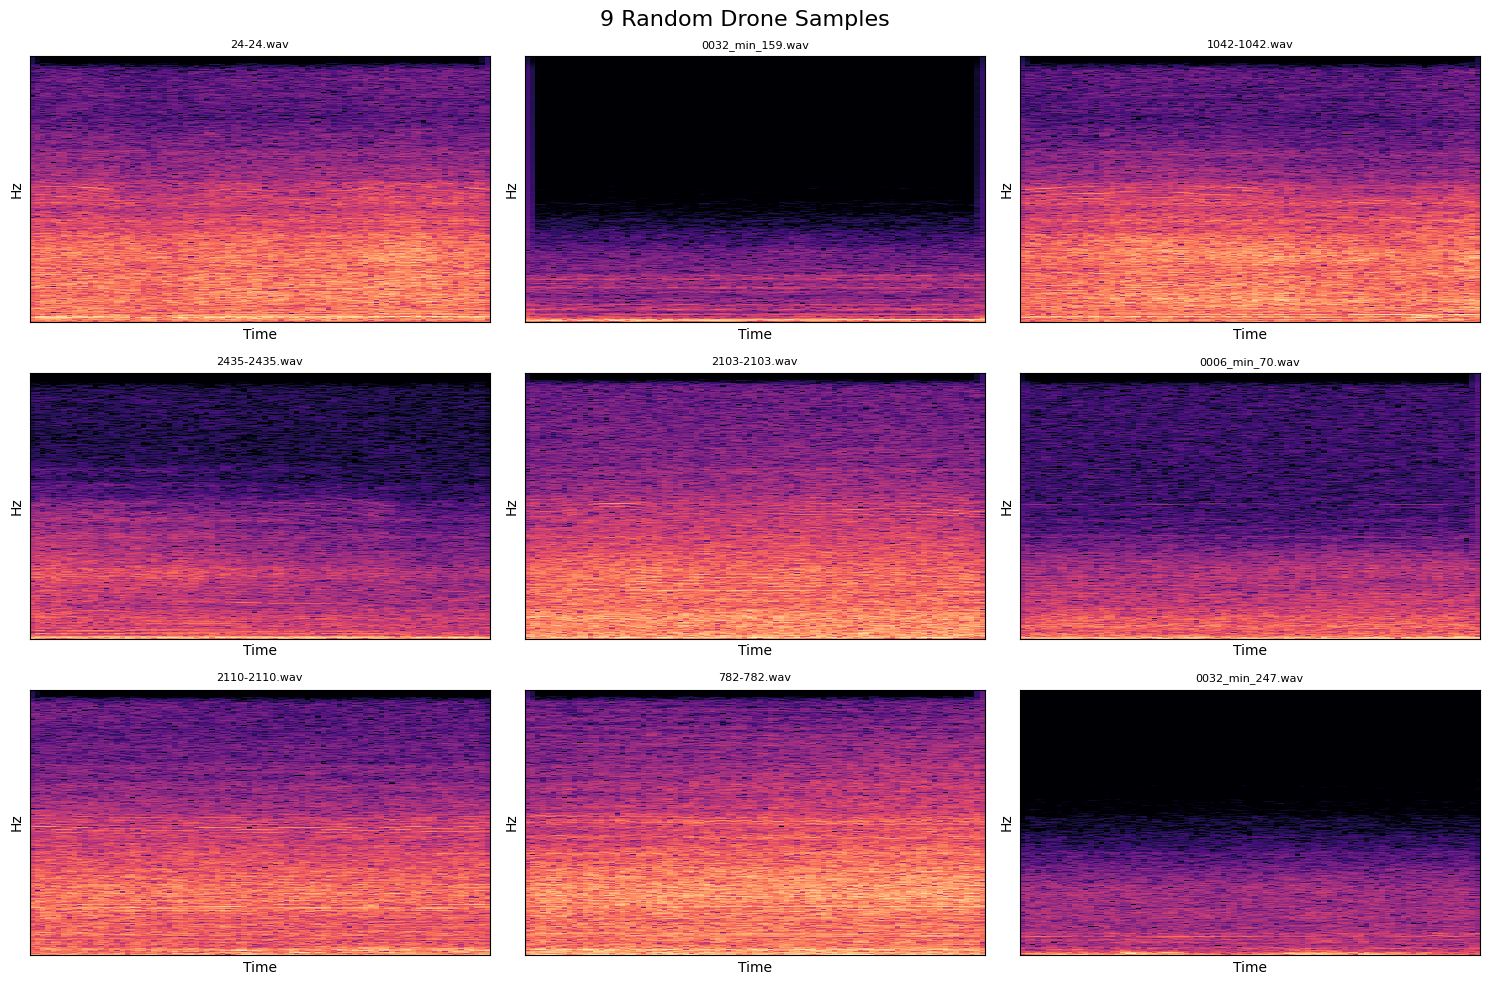

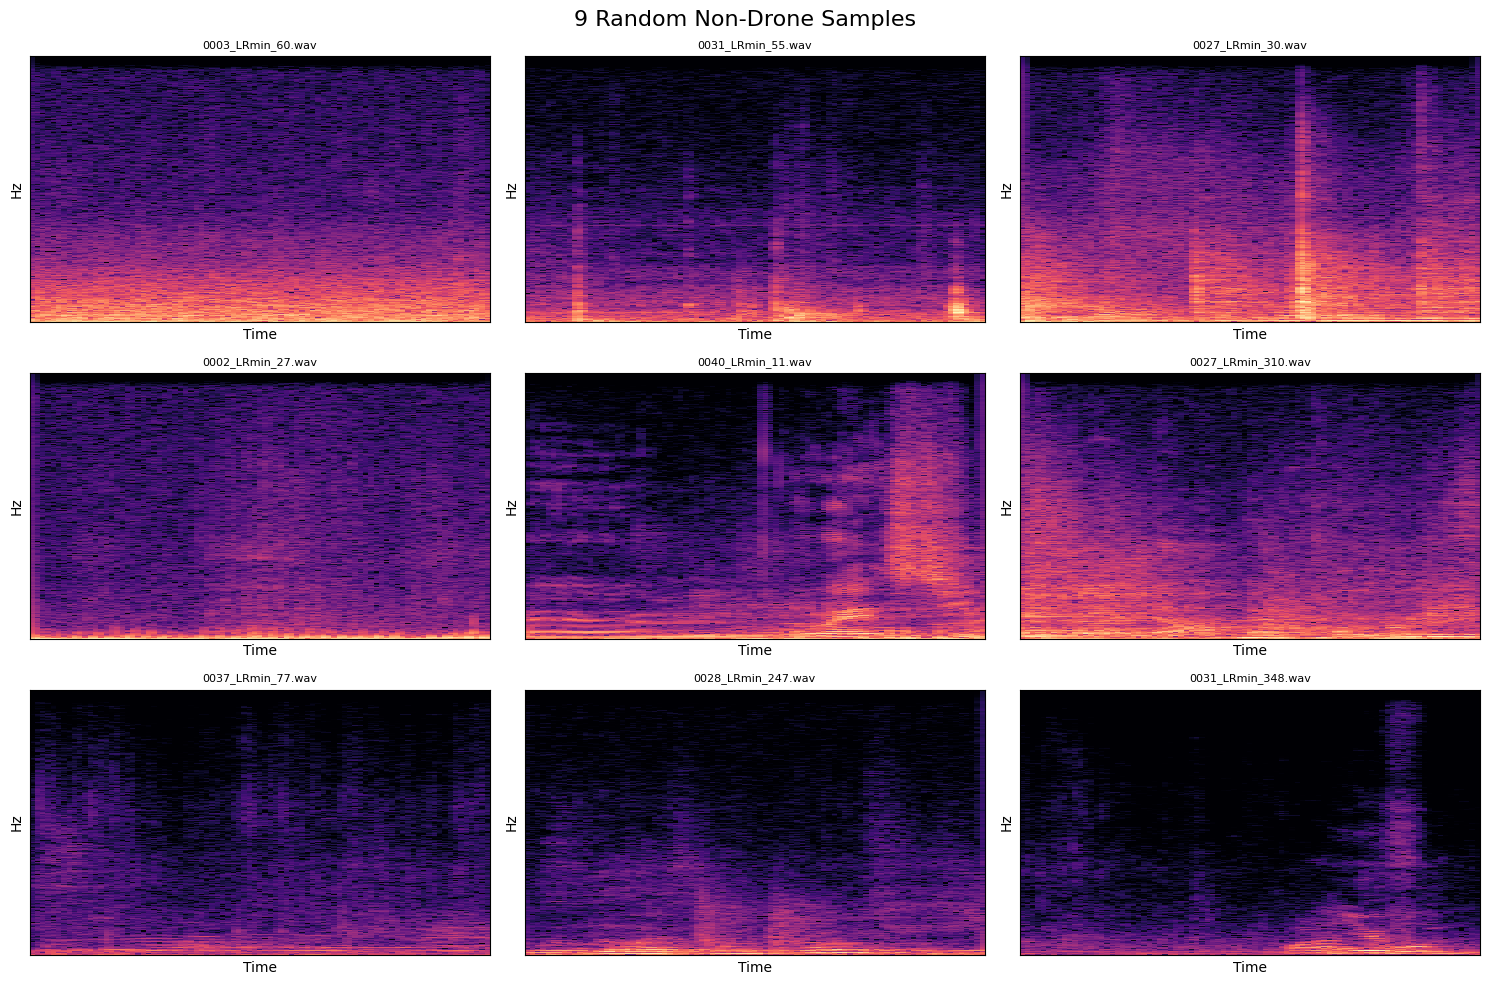

In [9]:
import random
def plot_grid(features, labels, filenames, indices, sr, title):
    fig, axes = plt.subplots(3, 3, figsize=(15, 10))
    fig.suptitle(title, fontsize=16)
    for ax, idx in zip(axes.flat, indices):
        D = librosa.amplitude_to_db(np.abs(librosa.stft(features[idx])), ref=np.max)
        librosa.display.specshow(D, y_axis="linear", x_axis="time", sr=sr, ax=ax)
        ax.set_title(filenames[idx], fontsize=8)
        ax.set_xticks([])
        ax.set_yticks([])
    plt.tight_layout()
    plt.show()

drone_indices = np.where(y == "drone")[0]
nondrone_indices = np.where(y != "drone")[0]

random_drone = random.sample(list(drone_indices), 9)
random_nondrone = random.sample(list(nondrone_indices), 9)

plot_grid(x, y, filenames, random_drone, SR, "9 Random Drone Samples")
plot_grid(x, y, filenames, random_nondrone, SR, "9 Random Non-Drone Samples")

In [23]:

def extract_features(audio, sr, n_mfcc=13):
    mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=n_mfcc)
    return np.mean(mfcc, axis=1)

In [28]:
X_features = np.array([extract_features(a, SR, N_MFCC) for a in x])

In [31]:
# Split
X_train, X_test, y_train, y_test = train_test_split(
    X_features, y, test_size=0.2, stratify=y, random_state=42
)

In [124]:
# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [198]:
# Train SVM
clf = SVC(kernel='rbf', C=0.02105, gamma='scale')
clf.fit(X_train, y_train)

,C,0.02102
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [199]:
# Evaluate
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       drone       0.95      1.00      0.97       953
       other       1.00      0.91      0.95       625

    accuracy                           0.96      1578
   macro avg       0.97      0.96      0.96      1578
weighted avg       0.97      0.96      0.96      1578



In [200]:
# In data/raw/recordings/{01,02}
def load_test_files(directory, sr):
    features = []
    names = []

    for filename in os.listdir(directory):
        if filename.endswith(".wav"):
            filepath = os.path.join(directory, filename)
            audio, _ = librosa.load(filepath, sr=sr)
            features.append(audio)
            names.append(filename)

    return features


In [201]:
x = load_test_files("../data/raw/recordings/01", sr=SR)
X_features = np.array([extract_features(a, SR, N_MFCC) for a in x])
# Scale features
X_features = scaler.transform(X_features)
y_pred = clf.predict(X_features)
y_pred

array(['drone', 'drone', 'drone', 'drone', 'drone', 'drone', 'drone',
       'drone', 'drone', 'drone', 'drone', 'drone', 'drone'], dtype='<U5')

In [196]:
x = load_test_files("../data/raw/recordings/02", sr=SR)
X_features = np.array([extract_features(a, SR, N_MFCC) for a in x])
# Scale features
X_features = scaler.transform(X_features)
y_pred = clf.predict(X_features)
y_pred

array(['drone', 'drone', 'drone', 'drone', 'drone', 'drone', 'drone',
       'drone', 'drone', 'drone', 'drone', 'drone', 'drone', 'drone',
       'drone', 'drone', 'drone', 'drone', 'drone'], dtype='<U5')

In [197]:
x = load_test_files("../data/raw/recordings/03", sr=SR)
X_features = np.array([extract_features(a, SR, N_MFCC) for a in x])
# Scale features
X_features = scaler.transform(X_features)
y_pred = clf.predict(X_features)
y_pred

array(['drone', 'drone', 'drone', 'drone', 'drone', 'drone', 'drone',
       'drone', 'drone', 'drone', 'drone', 'drone', 'drone', 'drone',
       'drone'], dtype='<U5')